In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = pd.read_csv("India statewise population_2021.csv")
data.head()

,State Name (India),Year,Population (Male),Population (Female)
0,Andaman And Nicobar Islands,2021,212000,189000
1,Andhra Pradesh,2021,26453000,26441000
2,Arunachal Pradesh,2021,792000,748000
3,Assam,2021,17938000,17300000
4,Bihar,2021,64552000,59602000


In [3]:
data_temp = data.copy()

In [4]:
# COnvert string to pandas categories
pd.api.types.is_string_dtype(data_temp["State Name (India)"])

True

In [5]:
# Find the columns which contain strings
# data_temp.items() treats the data like dict where keys are col names and values are the values corresponding to each key
for label, content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

State Name (India)


In [6]:
# This will convert all strings to category
for label, content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = content.astype("category").cat.as_ordered()    # assigns a numeric value to each category

In [7]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   State Name (India)   110 non-null    category
 1   Year                 110 non-null    int64   
 2   Population (Male)    110 non-null    int64   
 3   Population (Female)  110 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 4.2 KB


In [8]:
data_temp['State Name (India)'].cat.categories

Index(['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra And Nagar Haveli ', 'Daman And Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'The Dadra And Nagar Haveli And Daman And Diu', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object')

In [9]:
data_temp['State Name (India)'].cat.codes

0       0
1       1
2       2
3       3
4       4
       ..
105    32
106    34
107    35
108    36
109    37
Length: 110, dtype: int8

In [10]:
# Check missing data
data_temp.isnull().sum()/len(data_temp)

State Name (India)     0.0
Year                   0.0
Population (Male)      0.0
Population (Female)    0.0
dtype: float64

In [11]:
data_temp['StateCodes'] = data_temp['State Name (India)'].cat.codes
data_temp.head()

,State Name (India),Year,Population (Male),Population (Female),StateCodes
0,Andaman And Nicobar Islands,2021,212000,189000,0
1,Andhra Pradesh,2021,26453000,26441000,1
2,Arunachal Pradesh,2021,792000,748000,2
3,Assam,2021,17938000,17300000,3
4,Bihar,2021,64552000,59602000,4


## Modelling

In [12]:
X = data_temp.drop(columns=["Population (Female)","State Name (India)"])
y = data_temp["Population (Female)"]
X.head()

,Year,Population (Male),StateCodes
0,2021,212000,0
1,2021,26453000,1
2,2021,792000,2
3,2021,17938000,3
4,2021,64552000,4


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor(n_jobs=-1, random_state=42)
model1.fit(X_train,y_train)

y_preds1 = model1.predict(X_test)
y_preds1

array([5.00126720e+05, 1.52670822e+07, 5.57498898e+07, 2.62536478e+07,
       1.47157136e+07, 2.13689100e+04, 1.86045843e+07, 6.68476603e+06,
       1.13890533e+06, 3.38853679e+06, 1.01150768e+07, 1.15112360e+05,
       1.47805640e+05, 5.04319800e+04, 4.02831852e+07, 8.84383385e+07,
       3.74569749e+07, 4.84205172e+07, 4.56925655e+06, 1.17755163e+07,
       5.71717497e+06, 1.50157910e+05])

In [15]:
accuracy = model1.score(X_test,y_test)
print(accuracy*100,"%")

99.24497562058225 %


#### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.9990645843235987

In [17]:
y_preds_2 = model2.predict(X)
scores_2 = pd.DataFrame(columns=["Actual Female Population","Predicted Female Population"])
scores_2["Actual Female Population"] = y
scores_2["Predicted Female Population"] = y_preds_2
scores_2.head(10)

,Actual Female Population,Predicted Female Population
0,189000,7.166826e+05
1,26441000,2.508834e+07
2,748000,1.244642e+06
3,17300000,1.716733e+07
4,59602000,6.046487e+07
5,558000,1.102968e+06
6,14799000,1.432328e+07
7,9721000,1.076393e+07
8,775000,1.197558e+06
9,33417000,3.471306e+07


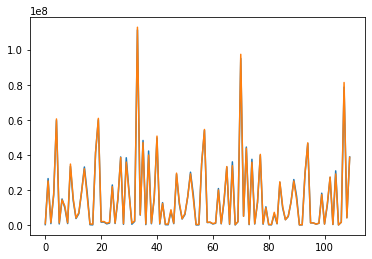

In [18]:
plt.plot(scores_2["Actual Female Population"], label='actual')
plt.plot(scores_2["Predicted Female Population"], label='predicted')

#### Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor(random_state=42)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9947369890098052

#### Rdige Regression

In [20]:
from sklearn.linear_model import Ridge

model4 = Ridge(random_state=42)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.9990645984370475

#### XG Boost

In [21]:
import xgboost as xgb

model5 = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
model4.fit(X_train,y_train)
model4.score(X_test,y_test)               

0.9990645984370475

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse= mean_squared_error(y, y_preds_2)
rmse= r2_score(y, y_preds_2)
mae = mean_absolute_error(y,y_preds_2)

mse,rmse,mae

(711911837930.4724, 0.9983553201156541, 580020.6694893402)

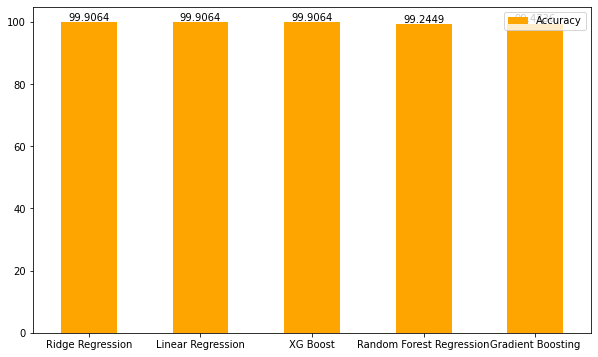

In [23]:
model_score = {'Ridge Regression':99.9064,
               'Linear Regression':99.9064,
               'XG Boost':99.9064,
               'Random Forest Regression':99.2449,
               'Gradient Boosting':99.4736}

model_compare = pd.DataFrame(model_score, index=["Accuracy"])
ax = model_compare.T.plot.bar(color="orange", figsize=(10,6));
plt.bar_label(ax.containers[0])
plt.xticks(rotation=0);


In [24]:
len(X_train), len(y_train)

(88, 88)

#### Model parameters

In [25]:
model2.coef_

array([ 1.69526299e+04,  9.28969084e-01, -5.42110059e+03])

In [26]:
model2.intercept_

-33741523.873136505

In [27]:
# Make future prediction
x_pred = np.array([2021, 64552000, 4])
x_pred = x_pred.reshape(-1, 3)
model2.predict(x_pred)

e:\Miniconda_Installation\envs\Jupyter_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60464869.04414403])

e:\Miniconda_Installation\envs\Jupyter_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.98, 'Multi-Linear Regression Model Visualization (R2 = 0.9931266082551353)')

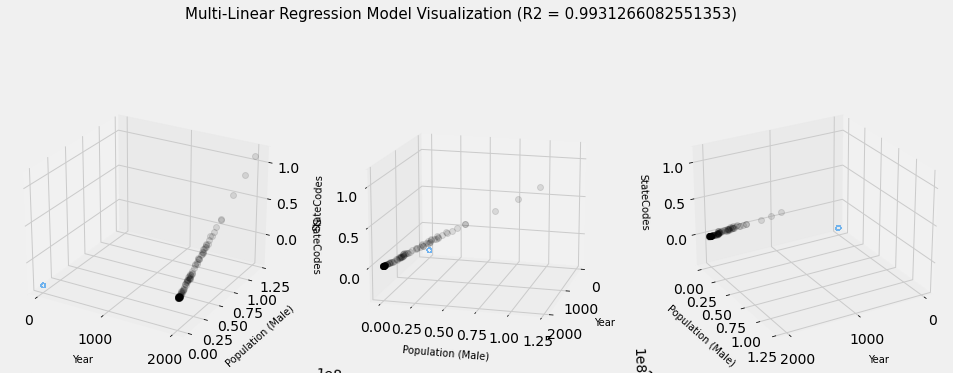

In [28]:
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# Preparing the data  
independent = data_temp[['Year', 'Population (Male)', 'StateCodes']].values.reshape(-1,3)  
dependent = data_temp['Population (Female)']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = model2.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = model2.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  
  
for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('Year', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('Population (Male)', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('StateCodes', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  

In [29]:
len(y_test), len(y_preds_2)

(22, 110)

ValueError: x and y must be the same size

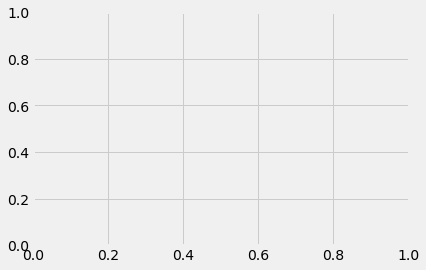

In [30]:
plt.scatter(y_test,y_preds_2);
plt.xlabel('Actual');
plt.ylabel('Predicted');

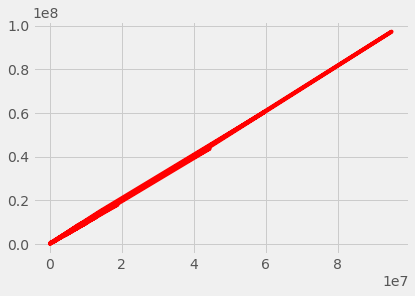

In [ ]:
plt.plot(y_test,y_preds_2,color ='red');